# Extract EEG signals from a dataset for seizure detection

# Import  Libraries

In [47]:
import numpy as np
import os
import pandas
import mne
import matplotlib
%matplotlib qt
import matplotlib.pyplot as plt;

# Locate Data
https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py

In [85]:
# Set data location
DEV_DATA_FOLDER = "E:/edf/dev"

# Set absence file names
ABSENCE_FILES_NAMES = []
with open(r'processed_data\absence\absence_files.txt', 'r') as f:
    for i in f.readlines():
        ABSENCE_FILES_NAMES.append(DEV_DATA_FOLDER + i[:-1])


## Load Data

In [86]:
raw = mne.io.read_raw_edf(ABSENCE_FILES_NAMES[0])
raw.load_data()

Extracting EDF parameters from E:\edf\dev\02_tcp_le\033\00003306\s001_2006_10_11\00003306_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 356499  =      0.000 ...  1425.996 secs...


Measurement date,"October 11, 2006 14:54:02 GMT"
Experimenter,Unknown
Participant,00003306
Digitized points,Not available
Good channels,41 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [1]:
raw.plot()

NameError: name 'raw' is not defined

Using matplotlib as 2D backend.


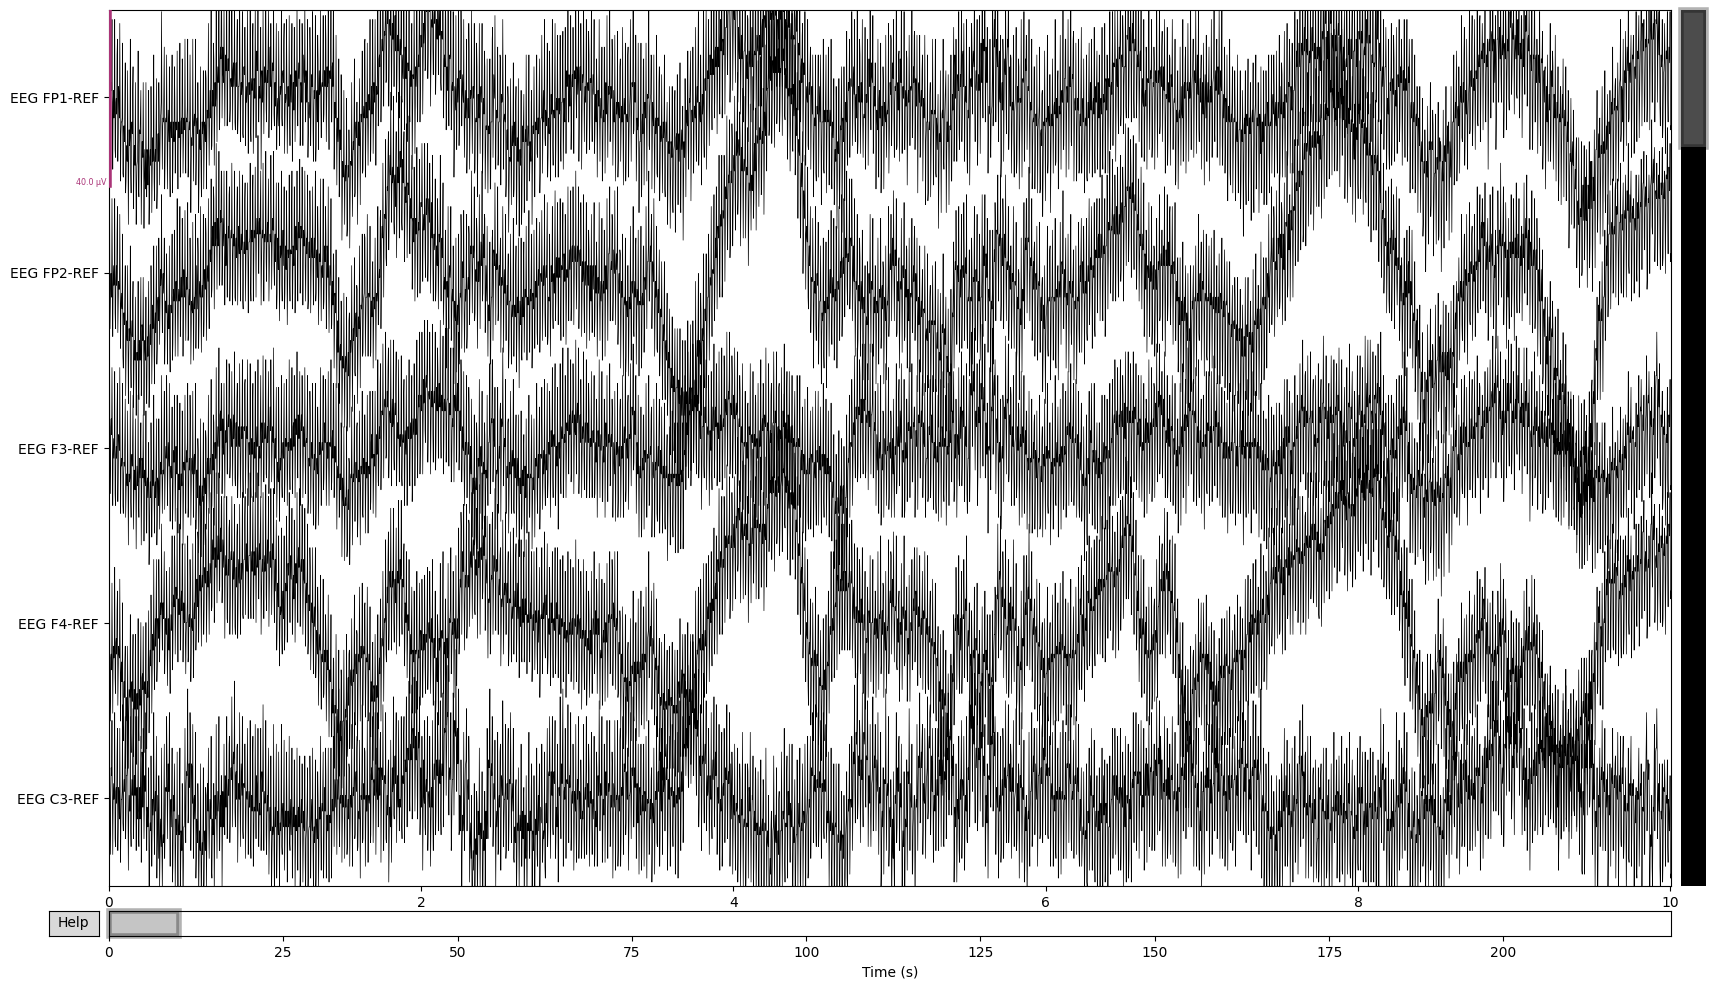

In [5]:
# raw.compute_psd().plot()
raw_back.plot(start=0, color="k", n_channels=5)

In [10]:
data, times = raw.get_data(return_times=True)
fft = np.fft.fft(data, axis=1)
P2 = np.abs(fft/data.shape[1])
P1 = P2[:,:data.shape[1]//2]
P1[:,1:-1] = 2*P1[:,1:-1]

f = np.linspace(0, 1/(2*times[1]), data.shape[1]//2)

plt.figure()
plt.plot(f, P1[0,:])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

: 